# 10. 상관계수

In [152]:
import pandas as pd
from pandas import DataFrame
import numbers
import numpy as np

In [153]:
# 동별 데이터
distance=pd.read_csv("final_distance_dong.csv", encoding='euc-kr') # 버스정류장, 병원, 상권, 문화센터 거리

senior_ratio=pd.read_csv("senior_population_dong.csv", encoding='euc-kr') # 노령인구 비율
#senior_ratio=senior_ratio['aged_population_ratio']

bus_time=pd.read_csv("busStop_mean_time_dong.csv", encoding='euc-kr') # 버스 배차 시간
bus_time=bus_time['busStop_mean_time']

In [154]:
print(len(distance), len(senior_ratio), len(bus_time))

22 23 22


In [155]:
senior_ratio=senior_ratio.drop(senior_ratio.index[0])
#senior_ratio

In [156]:
merge1=pd.merge(distance, senior_ratio, on='dong', how='left')
df=pd.concat([merge1, bus_time], axis=1, join='inner') # 전주시 전체 동 변수 dataframe 

In [158]:
# 공공형택시를 시행하고 있는 동 추출
# 조촌동, 우아동, 삼천동, 호성동
df1=df.loc[[19, 16, 9, 17]]

In [159]:
df1

,dong,busStop_distance,hospital_distance,store_distance,welfare_distance,library_distance,theater_distance,Unnamed: 0,total_population,senior_population,aged_population_ratio,busStop_mean_time
19,조촌동,0.149538,0.918896,2.509620,6.587327,2.312499,6.081181,20,12390,2255,0.182002,136.205129
16,우아동,0.211560,0.622823,1.395453,1.831933,1.149140,3.753784,17,24632,4005,0.162593,158.798747
9,삼천동,0.159486,0.447414,1.281139,1.820914,1.199177,1.852970,10,48345,7896,0.163326,86.853550
17,호성동,0.209014,0.978572,1.154572,2.902837,0.972590,2.793214,18,20806,3146,0.151206,174.954576


In [162]:
# x=탑승인구/전체 탑승인구
a=3642/21098 # 조촌동
b=10397/21098 # 우아동
c=2584/21098 # 삼천동
d=4475/21098 # 호성동

In [163]:
x=[a,b,c,d]

In [164]:
x=pd.DataFrame(x)
x.columns=['passenger']
x

,passenger
0,0.172623
1,0.492796
2,0.122476
3,0.212105


In [165]:
corr_df=pd.concat([df, x],axis=1, join='inner')
corr_df

,dong,busStop_distance,hospital_distance,store_distance,welfare_distance,library_distance,theater_distance,Unnamed: 0,total_population,senior_population,aged_population_ratio,busStop_mean_time,passenger
0,중앙동,0.114141,0.279026,0.384018,0.709611,0.515291,0.500021,1,7767,2126,0.273722,88.971488,0.172623
1,풍남동,0.213948,1.157429,1.453672,2.580567,1.249478,2.900363,2,4341,1490,0.343239,109.068206,0.492796
2,노송동,0.163273,0.698264,0.621190,0.464716,0.571752,1.219143,3,12771,3505,0.274450,97.011564,0.122476
3,완산동,0.163606,0.550629,0.926139,1.336842,0.809468,2.055115,4,5026,1510,0.300438,114.076284,0.212105


In [166]:
corr_df.drop(['dong', 'Unnamed: 0'], inplace=True, axis=1)

# 최종 dataframe
corr_df
#list(corr_df)

,busStop_distance,hospital_distance,store_distance,welfare_distance,library_distance,theater_distance,total_population,senior_population,aged_population_ratio,busStop_mean_time,passenger
0,0.114141,0.279026,0.384018,0.709611,0.515291,0.500021,7767,2126,0.273722,88.971488,0.172623
1,0.213948,1.157429,1.453672,2.580567,1.249478,2.900363,4341,1490,0.343239,109.068206,0.492796
2,0.163273,0.698264,0.621190,0.464716,0.571752,1.219143,12771,3505,0.274450,97.011564,0.122476
3,0.163606,0.550629,0.926139,1.336842,0.809468,2.055115,5026,1510,0.300438,114.076284,0.212105


## HeatMap

### 변수별 상관계수 확인 후 상관관계가 있는 변수 추출

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]


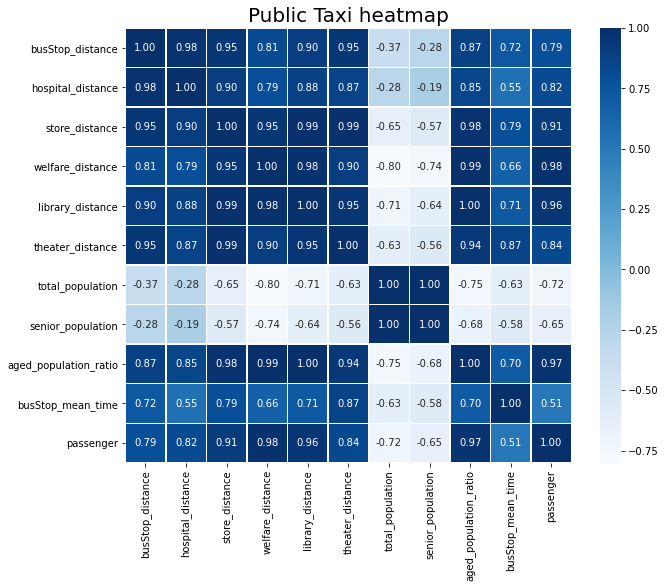

In [168]:
# 상관계수 Heatmap

sns.heatmap(data=corr_df.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.title("Public Taxi heatmap", fontsize=20)
plt.show()